# Pybalmorel for map plotting

This notebook provide examples on how to use the pybalmorel post processing map plotting tool. 

In [1]:
### 0.1 Use development scripts or the package installed from pip
use_development = True
if use_development:
    import sys
    import os
    # Adjust the sys.path to include the project root directory
    project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
    if project_root not in sys.path:
        sys.path.insert(0, project_root)
    from src.pybalmorel import MainResults
    from src.pybalmorel.utils import symbol_to_df
else:
    from pybalmorel import MainResults
    from pybalmorel.utils import symbol_to_df

c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:1501: SyntaxWarning: invalid escape sequence '\m'
  string = ['%d %s$_\mathrm{%s}$'%(int(ave), line_unit, subs)] + string
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:1509: SyntaxWarning: invalid escape sequence '\m'
  string.append('%d %s$_\mathrm{%s}$'%(int(line_legend_value), line_unit, subs))
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:1522: SyntaxWarning: invalid escape sequence '\m'
  string.append('%d %s$_\mathrm{%s}$'%(int(line_legend_cluster_values[i]), line_unit, subs))


In [2]:
### 0.2 Loading several scenarios
res = MainResults(files=['MainResults_Example1.gdx', 'MainResults_Example2.gdx', 'MainResults_Example3.gdx'], paths='files', scenario_names=['SC1', 'SC2', 'SC3'])

c:\Users\s233235\Documents\Pybalmorel\pybalmorel\examples\files\MainResults_Example1.gdx
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\examples\files\MainResults_Example2.gdx
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\examples\files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\classes.py:103: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = gams.GamsWorkspace()


## Basic map plotting

The map plotting tool only needs 2 arguments to work. One has to select the **scenario** (see scenarios importation in [this section](postprocessing.md)), and the **year**. \
With those two arguments, the map of Europe is plotted with the countries inside the model in beige and the countries outside of the model in grey. \
To plot the transmission lines and the generation information, one has to set the parameters **lines**, **generation**, and **commodity** (*Electricity* or *Hydrogen*). \
Please note that lines and generation can also be plotted alone but that **commodity is always necessary if one of them is used.**

c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())


Found MainResults in files\MainResults_Example3.gdx
generation_commodity must be either "Electricity" or "Hydrogen", set to None


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())


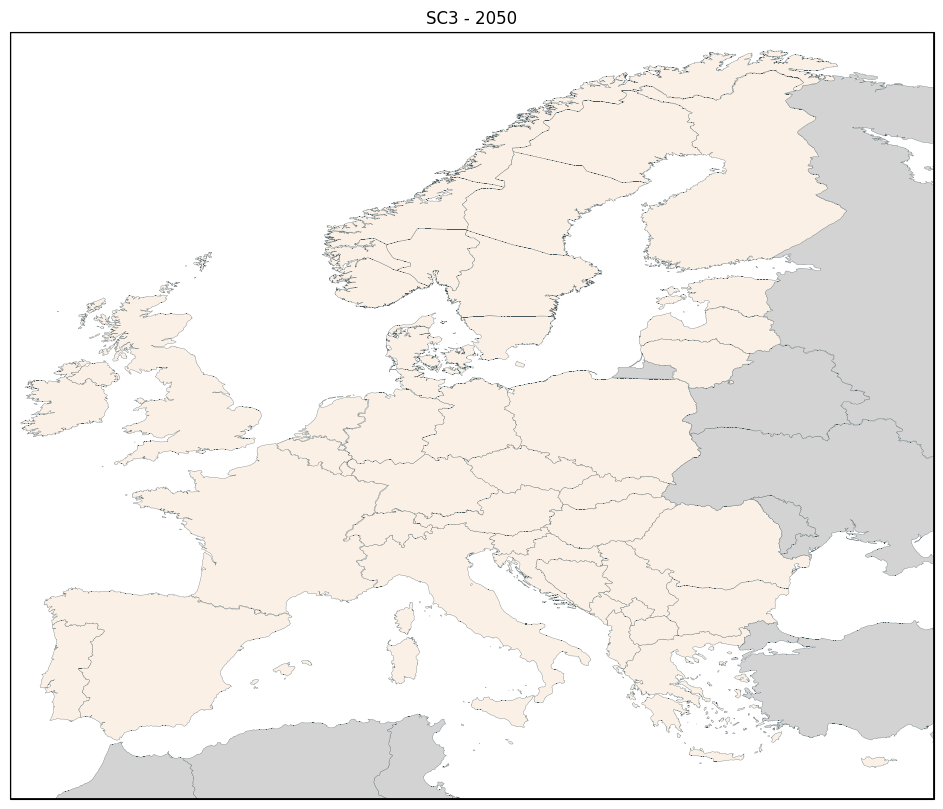

In [3]:
fig, ax = res.plot_map(scenario='SC3', year=2050)

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

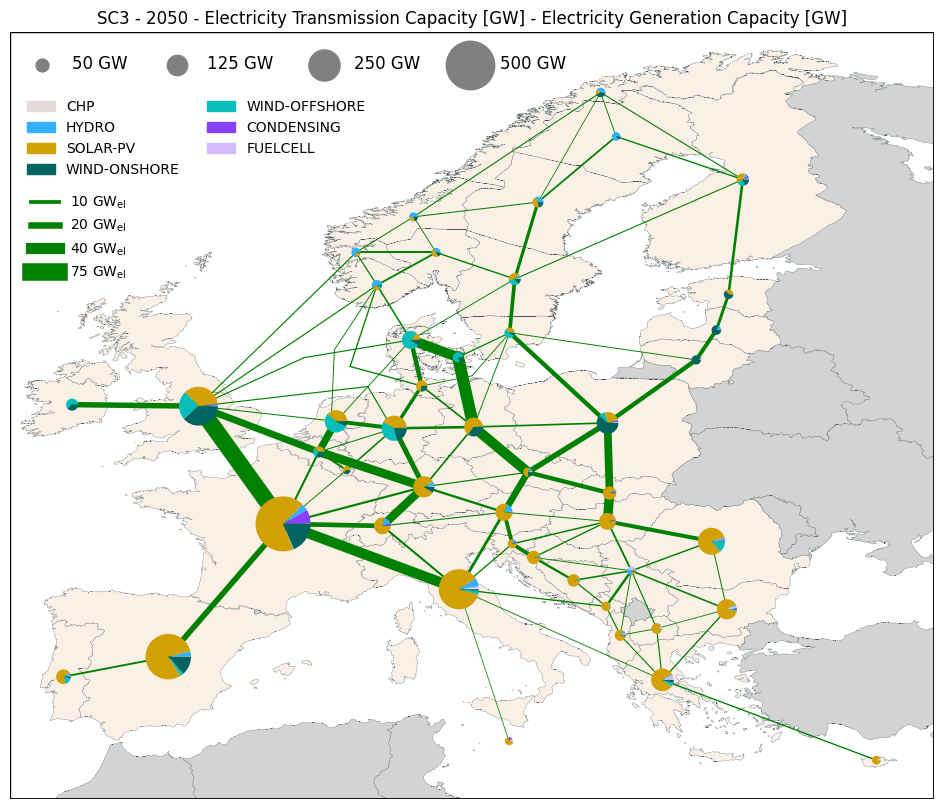

In [4]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='Capacity', generation='Capacity')

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

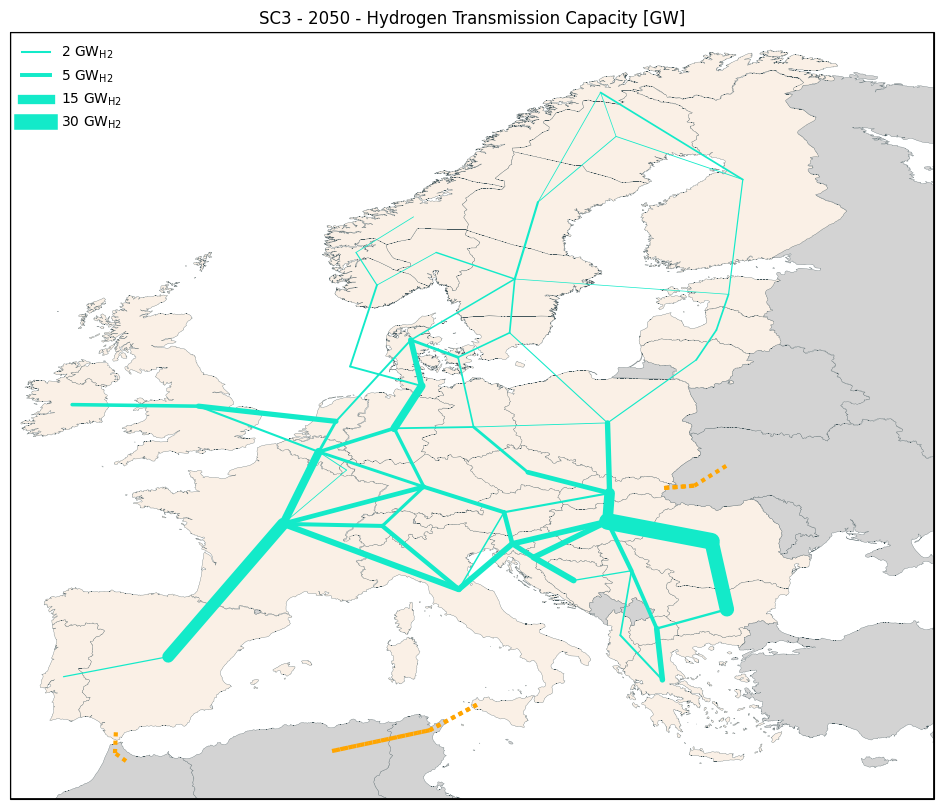

In [5]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Hydrogen', lines='Capacity')

## Selecting different transmission and generation information

The option **lines** allows to plot different transmission line information amongst *Capacity*, *FlowYear*, *FlowTime*, *UtilizationYear*, *UtilizationTime*. \
The option **generation** allows to plot different generation information amongst *Capacity*, *Production*, *ProductionTime*. \
Please note that for *FlowTime*, *UtilizationTime* and *ProductionTime*, it is possible to select a specific **S** and **T**. \
If one wants the lines commodity and the generation commodity to be different, they can use the **generation_commodity** option.

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:807: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

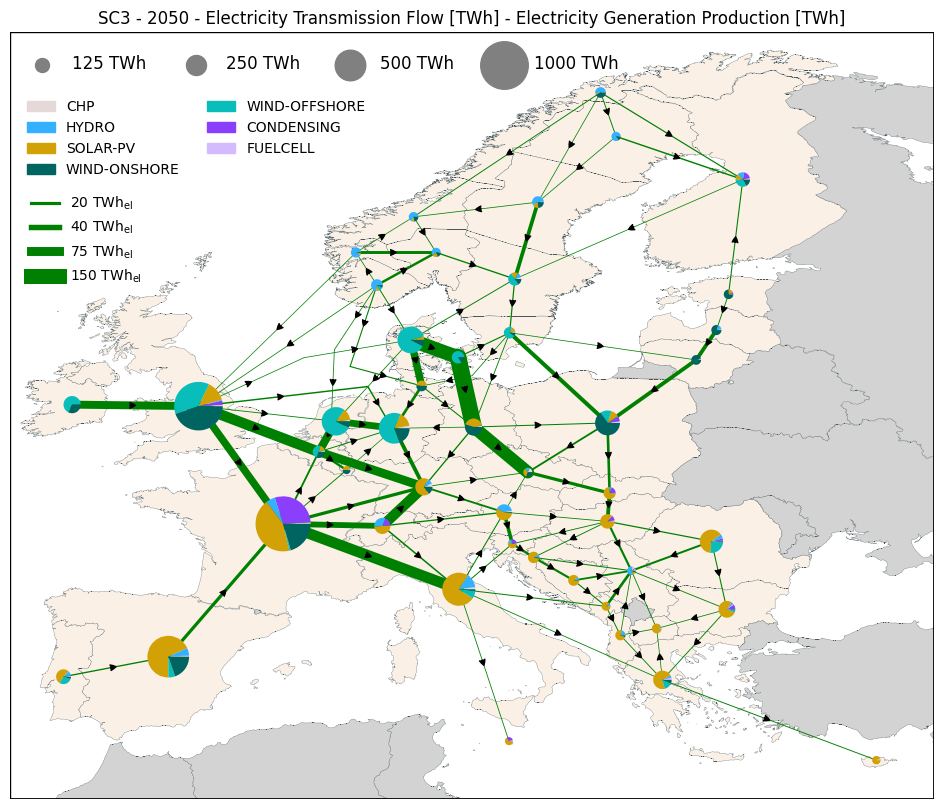

In [6]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='FlowYear', generation='Production')

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())


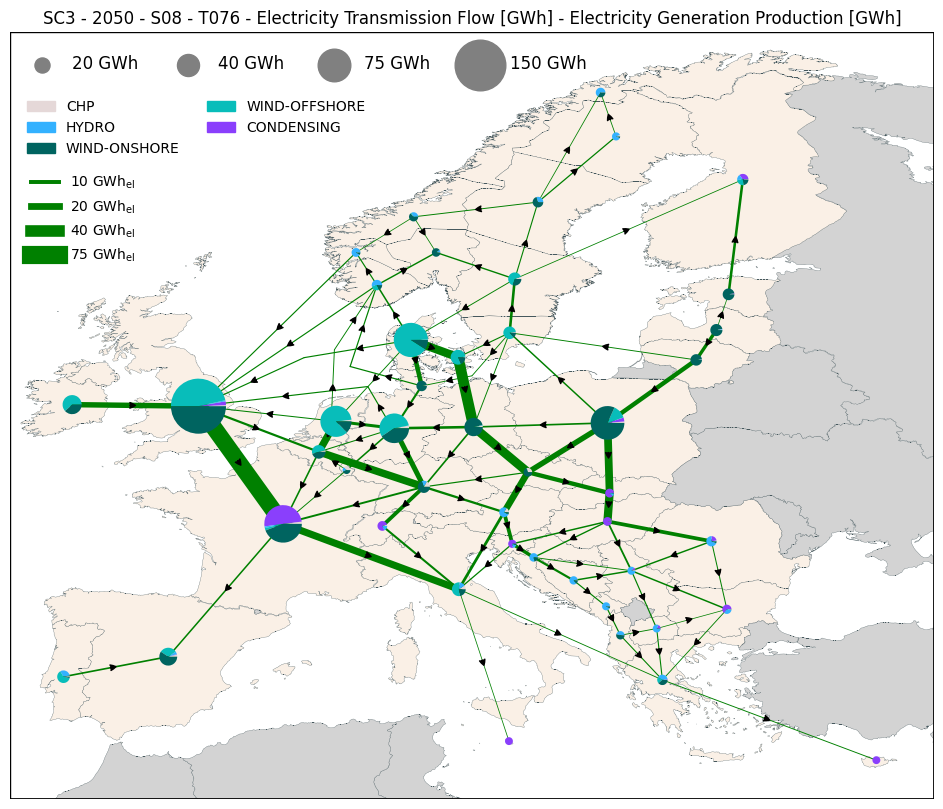

In [7]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='FlowTime', generation='ProductionTime', S='S08', T='T076')

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:807: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

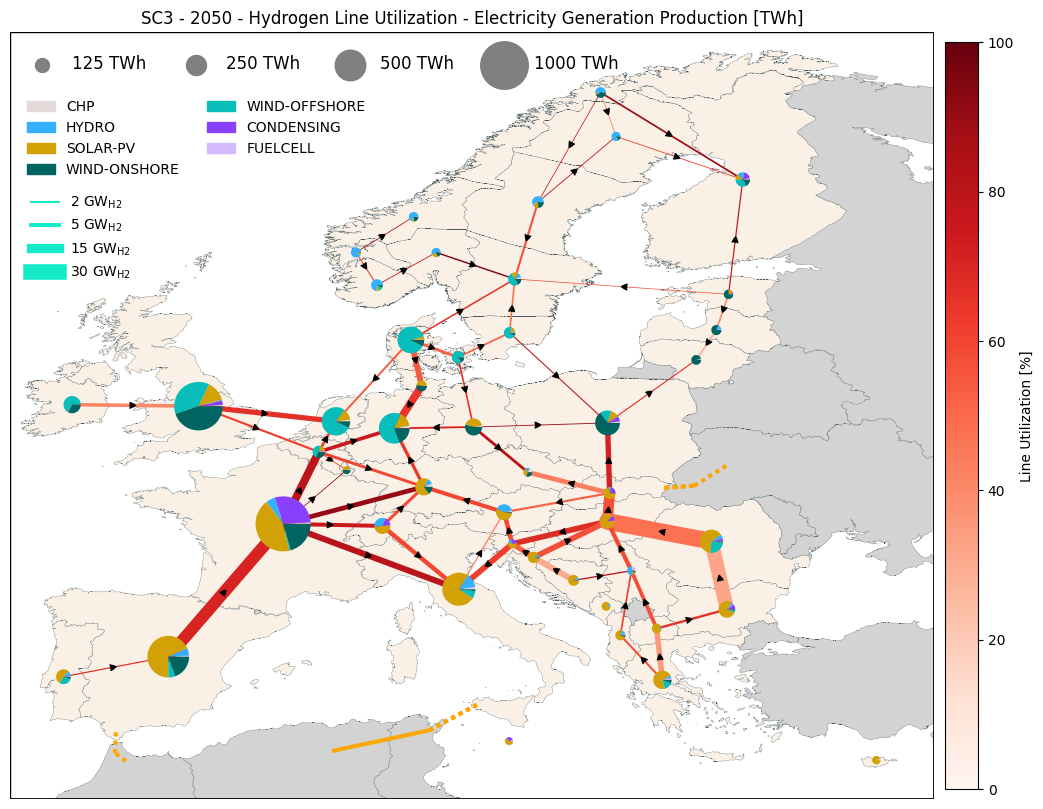

In [8]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Hydrogen', generation_commodity='Electricity', lines='UtilizationYear', generation='Production')

## Background information

Using the option **background**, it is possible to plot an additional information that colors the countries. For now *H2 Storage*, *Elec Storage*, *Elec Net Export*, *H2 Net Export* and *Elec Price* have been implemented. \
It is possible to personalize the background scale with the option **background_scale** and **background_scale_tick** as in the examples below (both can be used at the same time).

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

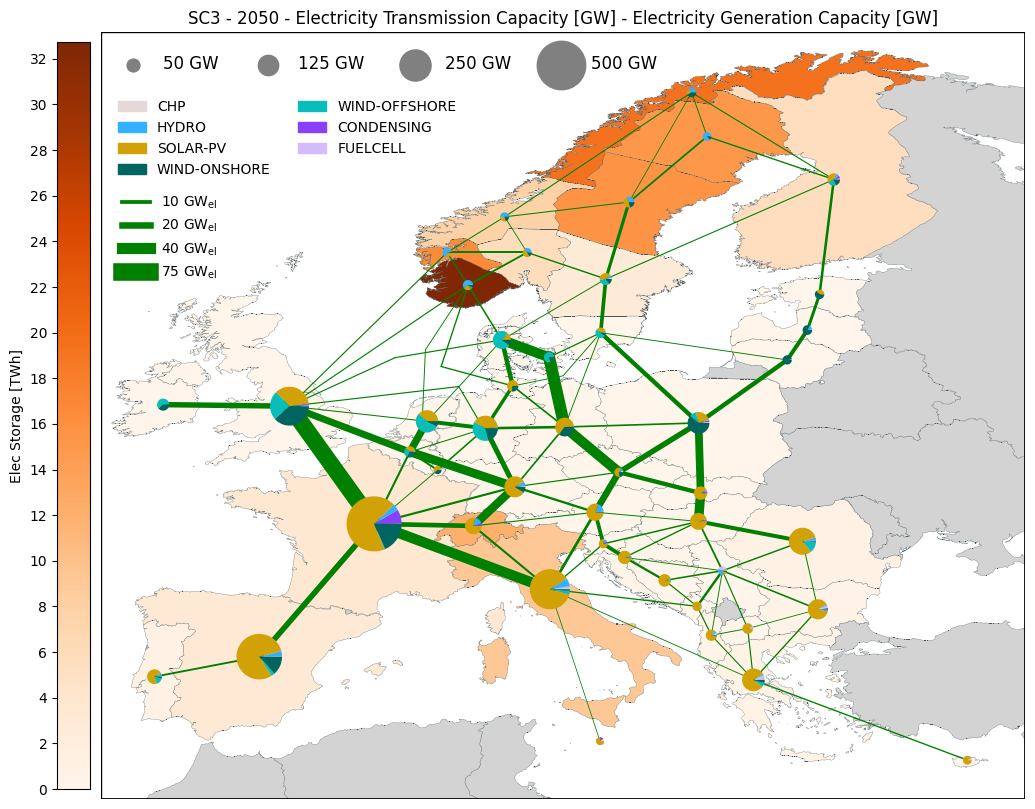

In [9]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='Capacity', generation='Capacity', 
                       background="Elec Storage")

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

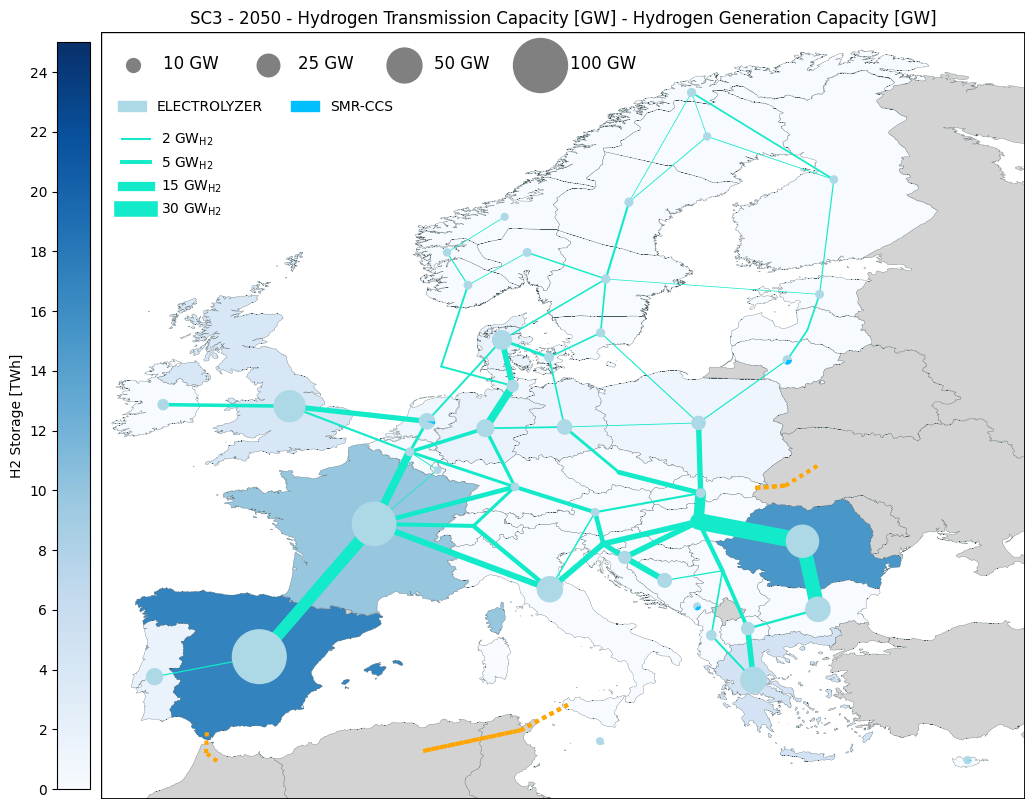

In [10]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Hydrogen', lines='Capacity', generation='Capacity', 
                       background="H2 Storage", background_scale = [0,25])

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:807: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

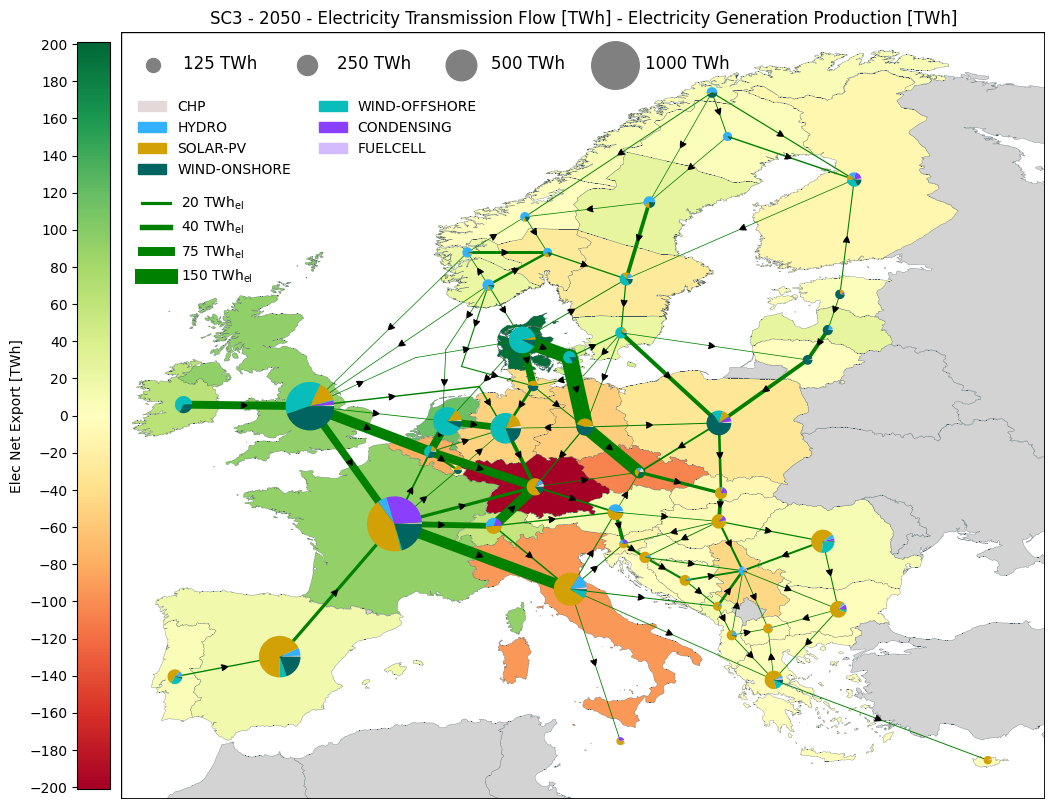

In [11]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='FlowYear', generation='Production', 
                       background="Elec Net Export", background_scale_tick = 20)

## Size of the elements and legend 

The size of the lines and pie charts is function of the options **line_width_cat** and **pie_radius_cat** and can be selected amongst *log*, *linear*, and *cluster*. (log is the default one) \
While *log* and *linear* are computing the sizes based on maximum and minimum values (those values can be changed), *cluster* needs the input of cluster values and cluster widths/radius to work (see example below). \
The size of the lines and the pie charts in the legend is automatic but one can choose to personalized them with **line_legend_cluster_values** and **pie_legend_cluster_values**. \
Please note that if *cluster* is choosed as category, then the legend will used those categories. The width of the lines is in point and the radius of the pie chart in data unit. \
It is also possible to change the legend of the pie charts and to select either *TECH_TYPE* or *FFF* to be plotted with the option **generation_var**.

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

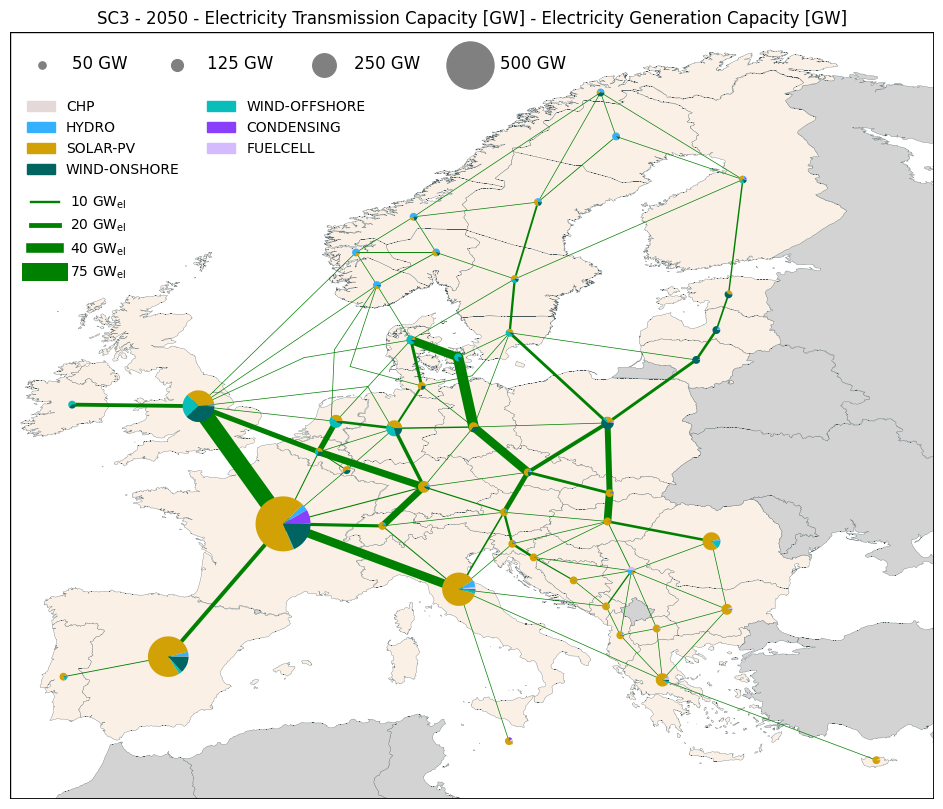

In [12]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='Capacity', generation='Capacity', generation_var='TECH_TYPE',
                       line_width_cat = 'linear', pie_radius_cat = 'linear')

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

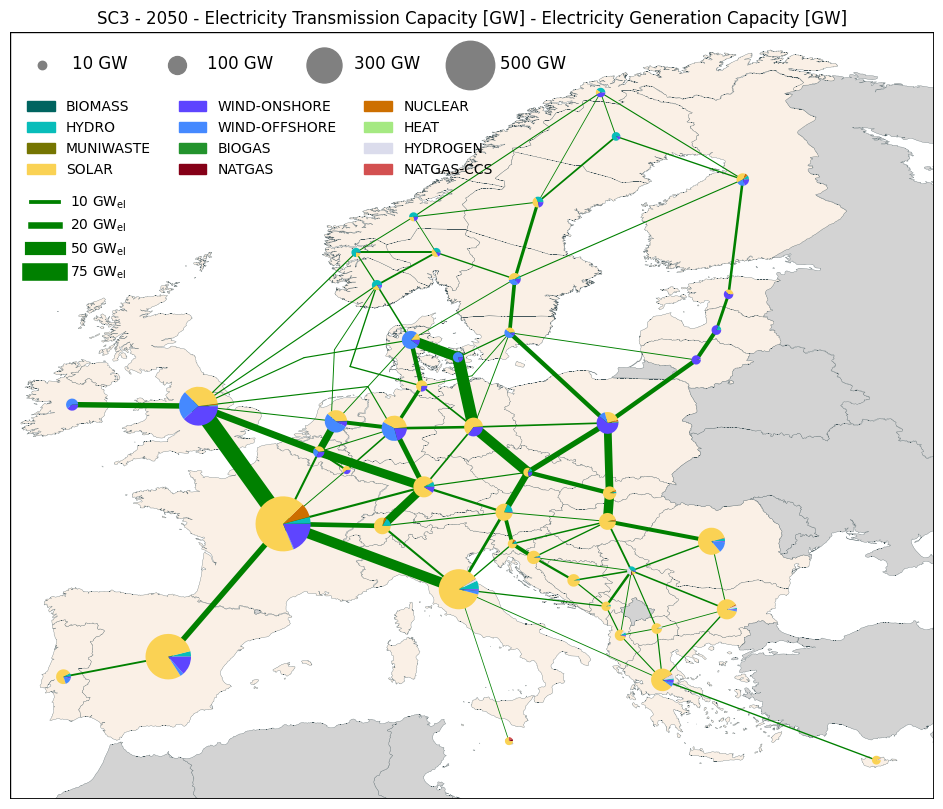

In [13]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='Capacity', generation='Capacity', generation_var='FFF',
                       line_legend_cluster_values=[10, 20, 50, 75], pie_legend_cluster_values=[10, 100, 300, 500])

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

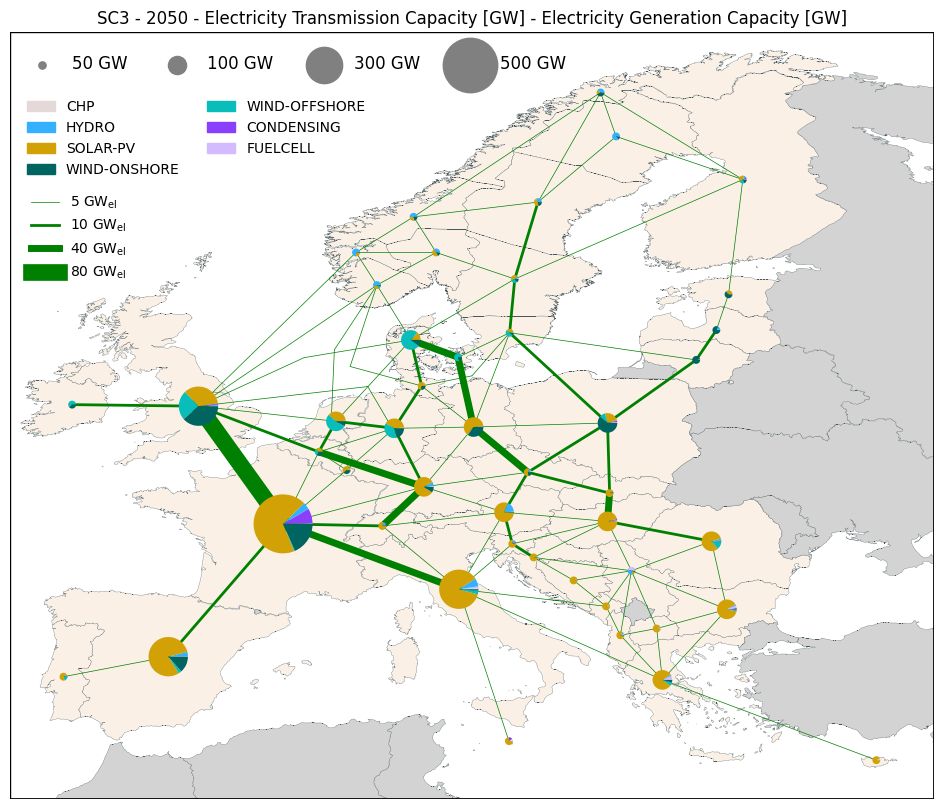

In [14]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='Capacity', generation='Capacity',
                       line_width_cat = 'cluster', line_cluster_values = [5, 10, 40, 80], line_cluster_widths = [0.5, 2, 5, 12],
                       pie_radius_cat = 'cluster', pie_cluster_values = [50, 100, 300, 500], pie_cluster_radius = [0.2, 0.5, 1, 1.5])

## Geofile input and coordinates issues

Using the option **path_to_geofile**, it is possible to use a personalized map file with a specific column (option *geo_file_region_column*) with the name of the regions in your Balmorel file. \
When using this option, the coordinates are set automatically as the border of the map plus an offset that can be modified with the option **coordinates_geofile_offset**. \
It is also possible to choose to plot only Denmark by setting *choosen_map_coordinates* as "DK" (if you only have data for denmark, please use it) or to select specific coordinates with *map_coordinates*. \
Please note that when modifying all of this, you will have trouble with the size of the lines and pie charts that are defined in data values. You will need to modify those to have something that you like. \
**For now, the legend is only working for the EU coordinates (in the case of having data for all EU) !!**

Found MainResults in files\MainResults_Example3.gdx
            If you want to modify the size of the offset, please use the option 'coordinates_geofile_offset', the default value is 0.5. 
            The size of the object on the map may be affected because default value have been selected. The most critical being the pie charts size parameters. 
            Please modify them to your convenience with 'pie_radius_min', 'pie_radius_max', 'pie_cluster_groups', and 'pie_cluster_radius' 
            If you wish to modify the line size parameters please use : 'line_width_min', 'line_width_max', 'line_cluster_groups', and 'line_cluster_widths'.


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())


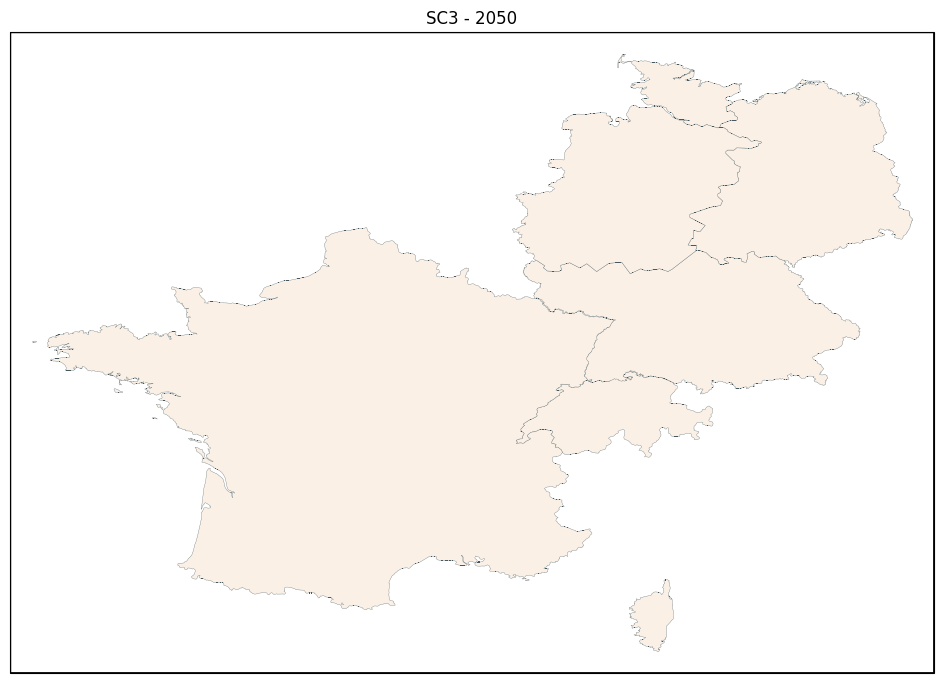

In [15]:
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', path_to_geofile="../../../examples/files/Geofile_Example.geojson")

Found MainResults in files\MainResults_Example1.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

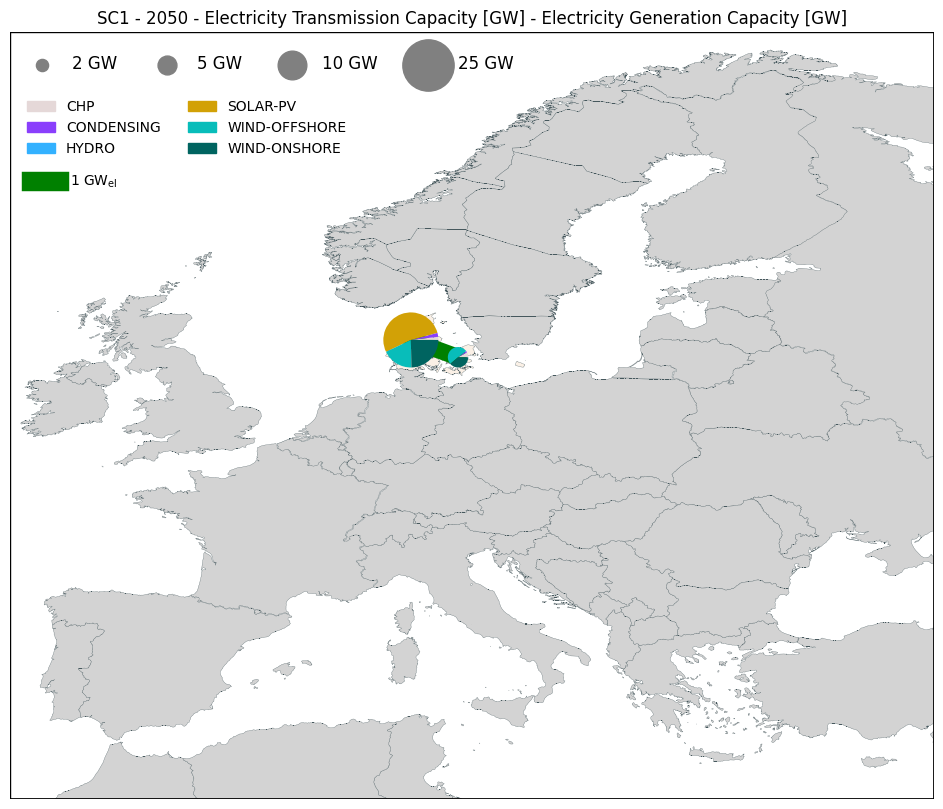

In [16]:
fig, ax = res.plot_map(scenario='SC1', year=2050, commodity='Electricity', lines='Capacity', generation='Capacity')

Found MainResults in files\MainResults_Example1.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:790: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

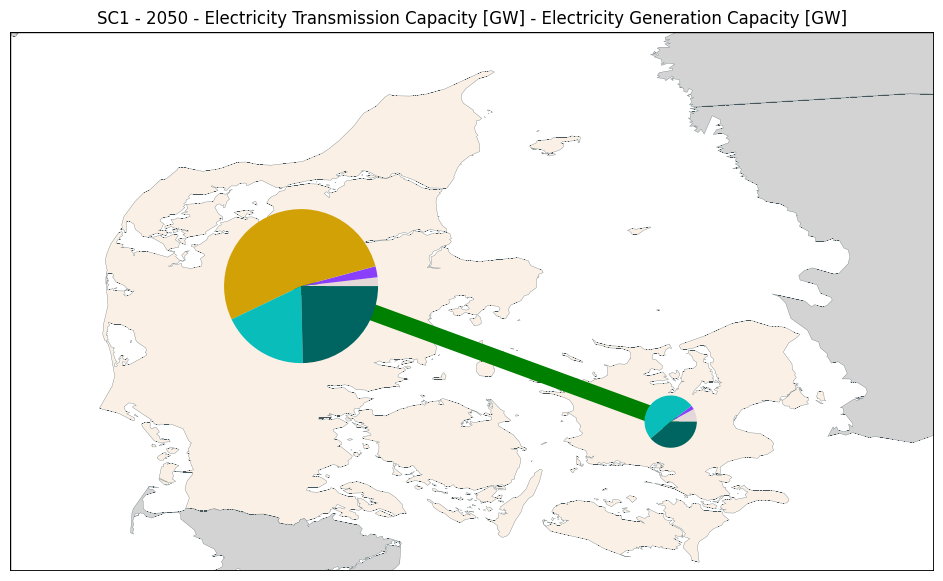

In [17]:
fig, ax = res.plot_map(scenario='SC1', year=2050, commodity='Electricity', lines='Capacity', generation='Capacity', choosen_map_coordinates="DK")

## Additional options

There is a large number of additional options available and the detailed can be found in the function's help below :

In [18]:
help(res.plot_map)

Help on method plot_map in module src.pybalmorel.classes:

plot_map(scenario: str, year: int, commodity: str = None, lines: str = None, generation: str = None, background: str = None, save_fig: bool = False, path_to_geofile: str = None, geo_file_region_column: str = 'id', **kwargs) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes] method of src.pybalmorel.classes.MainResults instance
    Plots the transmission capacities or flow in a scenario, of a certain commodity and the generation capacities or production of the regions.

    Args:
        path_to_result (str): Path to the .gdx file
        scenario (str): The scenario name
        year (int): The year of the results
        commodity (str, optional): Commodity to be shown in the map. Choose from ['Electricity', 'Hydrogen'].
        lines (str, optional): Information plots with the lines. Choose from ['Capacity', 'FlowYear', 'FlowTime', 'UtilizationYear', 'UtilizationTime].
        generation (str, optional): Generatio

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:807: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

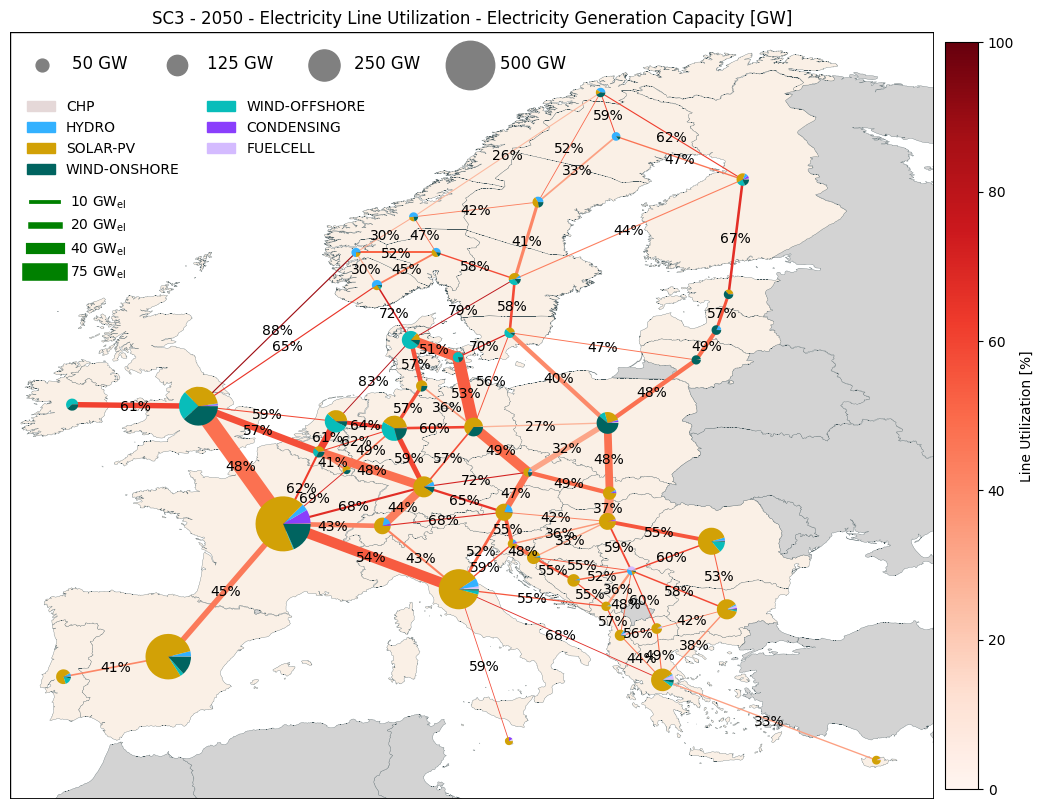

In [19]:
# If you want to show the value of the lines and not the arrows
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='UtilizationYear', generation='Capacity',
                       line_label_show=True, line_flow_show=False)

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:807: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

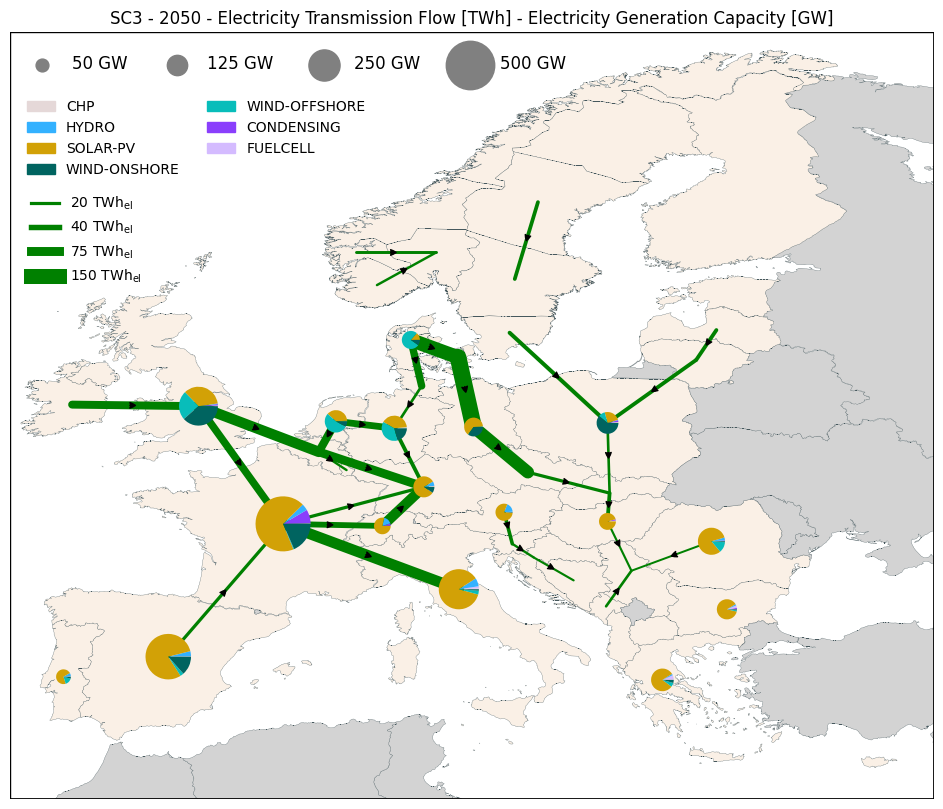

In [20]:
# If you want to not plot the smaller lines and pies you can define a minimum value
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='FlowYear', generation='Capacity',
                       line_show_min=10, pie_show_min=50)

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:807: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

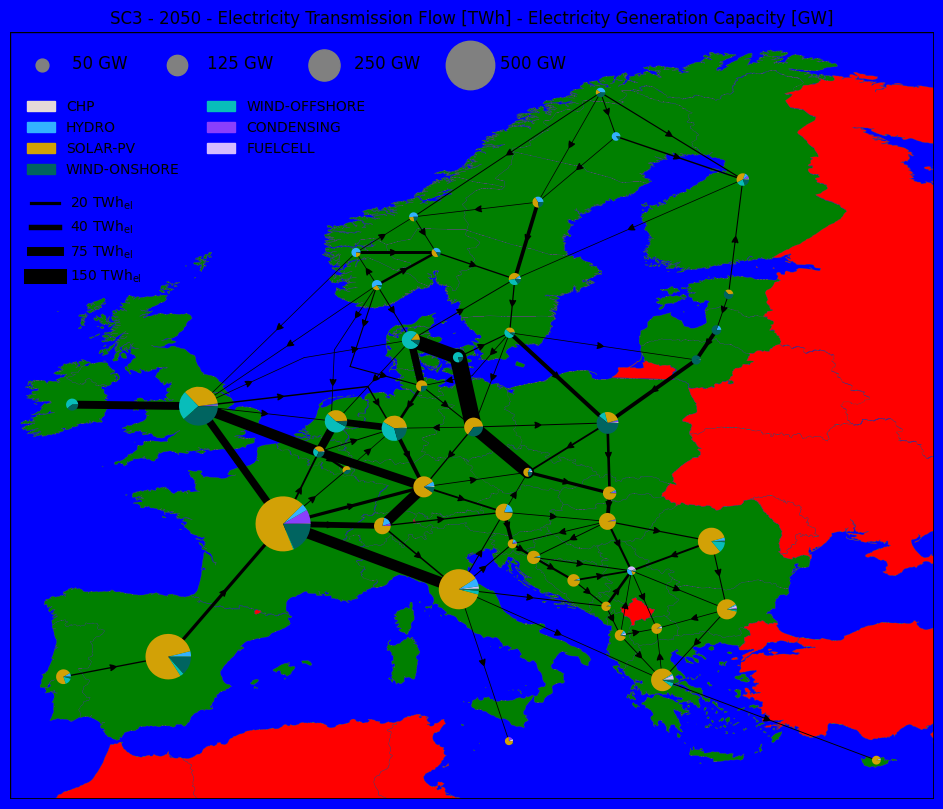

In [21]:
# If you want to specified the colors of different things on the graph
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='FlowYear', generation='Capacity',
                       background_color='blue', regions_model_color='green', regions_ext_color='red', line_color='black')

Found MainResults in files\MainResults_Example3.gdx


c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:400: UserWarning: The GAMS version (48.6.1) differs from the API version (48.4.0).
  ws = GamsWorkspace(os.getcwd())
c:\Users\s233235\Documents\Pybalmorel\pybalmorel\src\pybalmorel\plotting\maps_balmorel.py:807: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat o

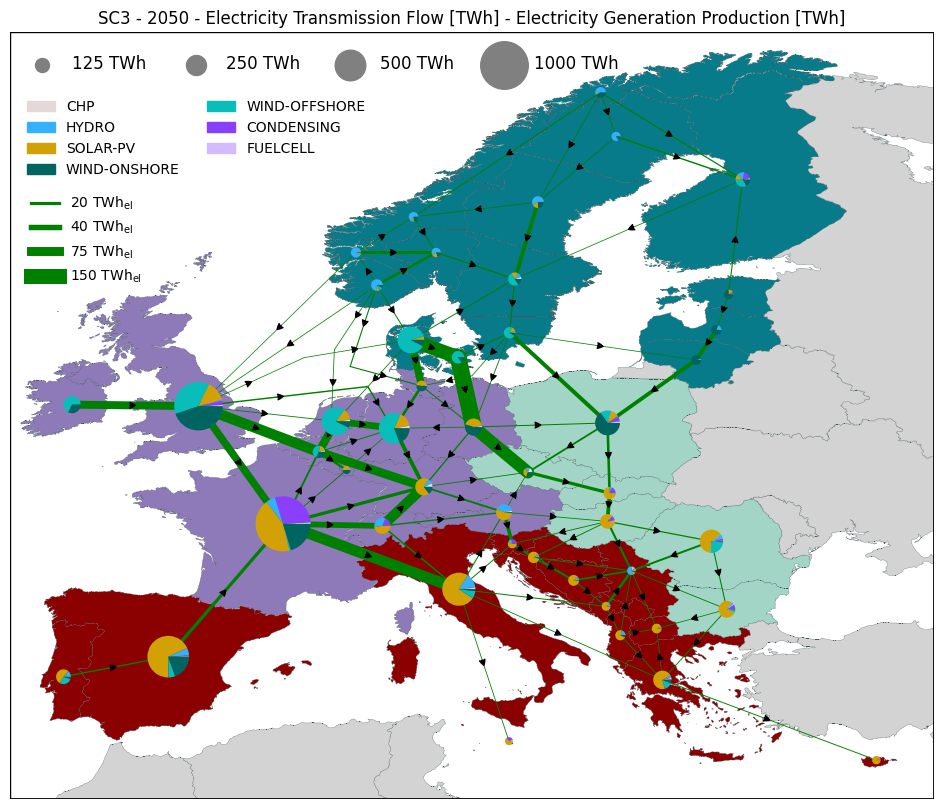

In [22]:
# If you want to specify the colors used for the different countries, using a csv file (this coloring has the priority on everything) 
fig, ax = res.plot_map(scenario='SC3', year=2050, commodity='Electricity', lines='FlowYear', generation='Production',
                       countries_colors_path = "../../../examples/files/countries_colors_example.csv")